## Лабораторная работа 1. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 20 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

### Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучающее (train) и тестовое (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму при оценке модели на тесте. И наоборот, большой размер тестовой выборки ведет к менее шумной оценке качества, однако обученные модели получаются менее точными.

Многие модели классификации предсказывают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). После этого принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения этой лабораторной не требуется.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку.

В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.

Для устранения описанной выше проблемы, **можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест**. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.

**Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH)**. 

Существуют различные **схемы кросс-валидации**:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, предсказывающий победу команды в компьютерной игре Dota2.
 
Целевой признак записан в переменной radiant_win. 

Для каждого матча вам предоставлена различная информация за первые 10 минут игры.

train.csv

Данный файл содержит информацию о том выйграла ли команда radiant в матче с идентификатором mid.

Каждая строчка файла содержит следующие колонки:

    mid — идентификатор матча
    radiant_won — факт того, что в игре победила команда radiant

test.csv

В данном файле содержатся идентификаторы игр для которых нужно сделать предсказание о победе команды radiant.

Каждая строчка файла содержит следующие колонки:

    mid — идентификатор матча

gold.csv

Данный файл содержит снимки данных игры, содержащих количество золота для каждого игрока.

Каждая строчка файла содержит следующие колонки:

    mid — идентификатор матча
    times — время в секундах когда был сделан снимок
    player_0, player_1, player_2, player_3, player_4 — количество золота для игроков команды radiant
    player_5, player_6, player_7, player_8, player_9 — количество золота для игроков команды dire

lh.csv

Данный файл содержит снимки данных, содержащих количество убитых нейтральных монстров (крипов) для каждого игрока.

Каждая строчка файла содержит следующие колонки:

    mid — идентификатор матча
    times — время в секундах когда был сделан снимок
    player_0, player_1, player_2, player_3, player_4 — количество убитых монстров для игроков команды radiant
    player_5, player_6, player_7, player_8, player_9 — количество убитых монстров для игроков команды dire

xp.csv

Данный файл содержит снимки данных, содержащих количество заработанного опыта для каждого игрока.

Каждая строчка файла содержит следующие колонки:

    mid — идентификатор матча
    times — время в секундах когда был сделан снимок
    player_0, player_1, player_2, player_3, player_4 — количество заработанного опыта для игроков команды radiant
    player_5, player_6, player_7, player_8, player_9 — количество заработанного опыта для игроков команды dire

items.csv

Разреженная матрица содержащая информацию о предметах, которые успели купить игроки за первые 10 минут игры.

Каждая строчка файла содержит следующие колонки:

    mid — идентификатор матча
    player — идентификатор игрока, с 0 по 4 игроки команды radiant, с 5 по 9 игроки команды dire
    item_0, ... , item_120 — количество купленных предметов

heroes.csv

Данный файл содержит информацию о типах героев, которые были выбраны игроки в каждом матче.

Каждая строчка файла содержит следующие колонки:

    mid — идентификатор матча
    player_0, player_1, player_2, player_3, player_4 — типы героев, выбранных игроками команды radiant
    player_5, player_6, player_7, player_8, player_9 — типы героев, выбранных игроками команды dire

events.csv

Данный файл содержит информацию о событиях, которые произошли в каждом матче.

Каждая строчка файла содержит следующие колонки:

    mid — идентификатор матча
    event_type — тип события
        0 — Командой был забран Aegis
        1 — Командой был украден Aegis
        2 — Командой были разрушены бараки соперника
        3 — Командой был сделано первое убийство героя соперника
        4 — Командой был убит Roshan.
        5 — Командой была разрушена своя башня
        6 — Командой была разрушена башня соперника
    from_team — название команды, которое инициировало событие
    time — время в секундах от старта игры когда событие произошло


### Обучение классификаторов на вещественных признаках

Загрузите набор данных *train.csv*, *gold.csv* и *lh.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [21]:
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/Shad/2021ml/lab1/'

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
train = pd.read_csv(PATH + 'train.csv')
gold = pd.read_csv(PATH + 'gold.csv')
lh = pd.read_csv(PATH + 'lh.csv')

In [23]:
train.head()

,mid,radiant_won
0,0,1
1,1,0
2,2,1
3,4,1
4,5,1


In [24]:
gold.head()

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,750,350,389,437,428,398,344,654,287,1056
1,0,120,957,1071,633,655,1080,669,1147,1164,438,1360
2,0,180,1161,1527,782,1103,1346,1058,1479,1574,587,2072
3,0,240,1571,2033,932,1515,2058,1760,1767,2387,737,2283
4,0,300,1721,2313,1082,1790,2699,2087,1986,2898,887,3302


In [25]:
lh.head()

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,1,2,1,1,2,3,2,7,1,2
1,0,120,1,5,1,2,6,5,6,14,1,6
2,0,180,2,10,1,7,8,9,9,18,1,9
3,0,240,2,13,1,13,12,9,12,29,1,10
4,0,300,2,15,1,17,19,13,13,36,1,19


Иногда в данных встречаются пропуски. Способ обозначения пропусков либо прописывается в описании к данным, либо на месте пропуска после чтения данных оказывается значение [NaN](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "-1". 

**Задание 1** (1 балл) 

Проанализируйте датасет и найдите все признаки, имеющие пропущенные значения (опишите свои наблюдения). 

Предобработайте текущий датасет так, что бы в нём не осталось пропусков (обоснуйте свой выбор метода предобработки).

In [26]:
(train == -1).any().any(), (gold == -1).any().any(), (lh == -1).any().any()

(False, False, False)

In [27]:
train.isna().any().any(), gold.isna().any().any(), lh.isna().any().any()

(False, False, False)

*В датасетах train, gold, lh пропущенных значений нет. Если бы были, то я бы скорее всего использовал либо df.dropna(), либо df.fillna(0).*



В начале мы будем работать только с вещественными признаками. 

Возьмите из *gold.csv* и *lh.csv* данные по 600 секунде для каждого матча и подклейте их к *train.csv* (см. [булево индексирование](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) и [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join)).

In [28]:
train1 = pd.merge(train, gold[gold['times'] == 600], how='inner', on='mid')
train1 = train1.rename(columns={'player_{}'.format(i): 'player_{}_gold'.format(i) for i in range(10)})
train1 = pd.merge(train1, lh[lh['times'] == 600], how='inner', on='mid')
train1 = train1.rename(columns={'player_{}'.format(i): 'player_{}_lh'.format(i) for i in range(10)})
train1.head()

,mid,radiant_won,times_x,player_0_gold,player_1_gold,player_2_gold,player_3_gold,player_4_gold,player_5_gold,player_6_gold,player_7_gold,player_8_gold,player_9_gold,times_y,player_0_lh,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_5_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh
0,0,1,600,3454,5206,2613,4426,5755,4072,3997,5917,1725,6384,600,4,43,3,57,41,34,35,75,2,46
1,1,0,600,2477,5760,3816,4353,5759,7659,5066,2748,4440,4623,600,5,63,14,28,47,49,23,3,30,39
2,2,1,600,3604,1948,8581,4390,2869,3096,2301,5130,2530,2491,600,34,6,69,42,23,6,12,56,13,12
3,4,1,600,3675,4103,5154,3030,2076,3920,3494,3392,4458,2220,600,30,41,45,23,4,26,9,23,37,6
4,5,1,600,4252,2412,2545,4264,2544,4752,5389,4954,3954,2992,600,42,5,16,30,3,42,24,53,12,14


**Задание 2** (1 балл)

Постройте для команд radiant и dire различные агригаты по игрокам на 600 секунде. Опишите какие именно агригаты вы построили и почему.

In [29]:
radiant_players_gold = ['player_{}_gold'.format(i) for i in range(5)]
dire_players_gold = ['player_{}_gold'.format(i) for i in range(5, 10)]
radiant_players_lh = ['player_{}_lh'.format(i) for i in range(5)]
dire_players_lh = ['player_{}_lh'.format(i) for i in range(5, 10)]


train1['radiant_gold_mean'] = train1[radiant_players_gold].mean(axis=1)
train1['dire_gold_mean'] = train1[dire_players_gold].mean(axis=1)

train1['radiant_gold_max'] = train1[radiant_players_gold].max(axis=1)
train1['dire_gold_max'] = train1[dire_players_gold].max(axis=1)

train1['radiant_lh_mean'] = train1[radiant_players_lh].mean(axis=1)
train1['dire_lh_mean'] = train1[dire_players_lh].mean(axis=1)

train1['radiant_lh_max'] = train1[radiant_players_lh].max(axis=1)
train1['dire_lh_max'] = train1[dire_players_lh].max(axis=1)

train1.head()

,mid,radiant_won,times_x,player_0_gold,player_1_gold,player_2_gold,player_3_gold,player_4_gold,player_5_gold,player_6_gold,player_7_gold,player_8_gold,player_9_gold,times_y,player_0_lh,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_5_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh,radiant_gold_mean,dire_gold_mean,radiant_gold_max,dire_gold_max,radiant_lh_mean,dire_lh_mean,radiant_lh_max,dire_lh_max
0,0,1,600,3454,5206,2613,4426,5755,4072,3997,5917,1725,6384,600,4,43,3,57,41,34,35,75,2,46,4290.8,4419.0,5755,6384,29.6,38.4,57,75
1,1,0,600,2477,5760,3816,4353,5759,7659,5066,2748,4440,4623,600,5,63,14,28,47,49,23,3,30,39,4433.0,4907.2,5760,7659,31.4,28.8,63,49
2,2,1,600,3604,1948,8581,4390,2869,3096,2301,5130,2530,2491,600,34,6,69,42,23,6,12,56,13,12,4278.4,3109.6,8581,5130,34.8,19.8,69,56
3,4,1,600,3675,4103,5154,3030,2076,3920,3494,3392,4458,2220,600,30,41,45,23,4,26,9,23,37,6,3607.6,3496.8,5154,4458,28.6,20.2,45,37
4,5,1,600,4252,2412,2545,4264,2544,4752,5389,4954,3954,2992,600,42,5,16,30,3,42,24,53,12,14,3203.4,4408.2,4264,5389,19.2,29.0,42,53


*В качестве агрегатов взял средние и максимальные значения золота и убитых крипов в командах, на графиках вроде видна зависимость победы от них.*

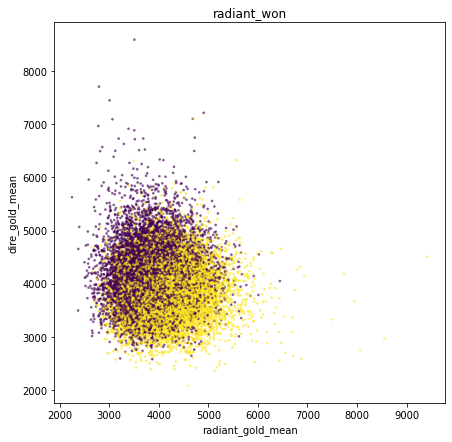

In [30]:
plt.figure(figsize=(7, 7))
plt.scatter(train1['radiant_gold_mean'], 
            train1['dire_gold_mean'], c=train1['radiant_won'], alpha=0.5, s=3)

plt.title('radiant_won')
plt.xlabel('radiant_gold_mean')
plt.ylabel('dire_gold_mean')
plt.show()

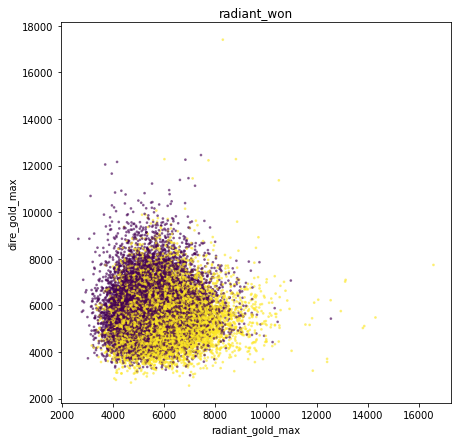

In [31]:
plt.figure(figsize=(7, 7))
plt.scatter(train1['radiant_gold_max'], 
            train1['dire_gold_max'], c=train1['radiant_won'], alpha=0.5, s=3)

plt.title('radiant_won')
plt.xlabel('radiant_gold_max')
plt.ylabel('dire_gold_max')
plt.show()

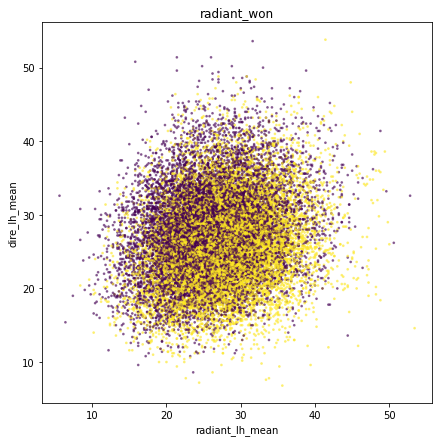

In [32]:
plt.figure(figsize=(7, 7))
plt.scatter(train1['radiant_lh_mean'], 
            train1['dire_lh_mean'], c=train1['radiant_won'], alpha=0.5, s=3)

plt.title('radiant_won')
plt.xlabel('radiant_lh_mean')
plt.ylabel('dire_lh_mean')
plt.show()

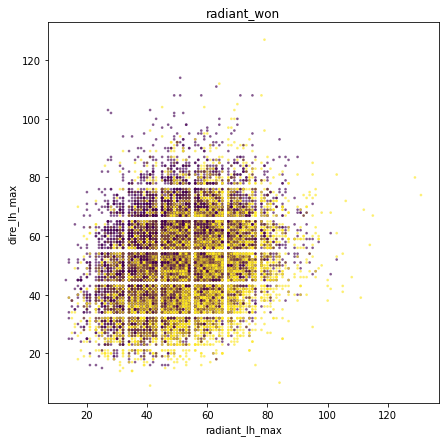

In [33]:
plt.figure(figsize=(7, 7))
plt.scatter(train1['radiant_lh_max'], 
            train1['dire_lh_max'], c=train1['radiant_won'], alpha=0.5, s=3)

plt.title('radiant_won')
plt.xlabel('radiant_lh_max')
plt.ylabel('dire_lh_max')
plt.show()

Сейчас и далее будем рассматривать следующие алгоритмы:
 - [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 - [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
 - [Multi-layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

**Задание 3** (1.5 балла) 

Для каждого алгоритма выберете один гиперпараметр и подберите его оптимальное значение. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

In [34]:
numeric_features = ['radiant_gold_mean', 'dire_gold_mean', 'radiant_gold_max', 'dire_gold_max',
                    'radiant_lh_mean', 'dire_lh_mean', 'radiant_lh_max', 'dire_lh_max']
numeric_features = ['radiant_gold_mean', 'dire_gold_mean',
                    'radiant_lh_mean', 'dire_lh_mean']

In [146]:
def plot_cv_res(cv_res, param_name):
    plt.plot([str(elem) for elem in cv_res[param_name].data], cv_res['mean_test_score'])
    plt.fill_between(
        [str(elem) for elem in cv_res[param_name].data], 
        cv_res['mean_test_score'] - cv_res['std_test_score'], 
        cv_res['mean_test_score'] + cv_res['std_test_score'], 
        alpha=0.2
    )
    plt.show()

*Logistic Regression Classifier*

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold

model_lr = LogisticRegression(max_iter=1000)
parameters = {'penalty': ['l2'], 'C': [0.000005, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

clf_lr1 = GridSearchCV(model_lr, parameters, cv=KFold(n_splits=5))
clf_lr1.fit(train1[numeric_features], train1['radiant_won'])

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [5e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'penalty': ['l2']})

In [112]:
clf_lr1.cv_results_['mean_test_score'].max()

0.6513575569963235

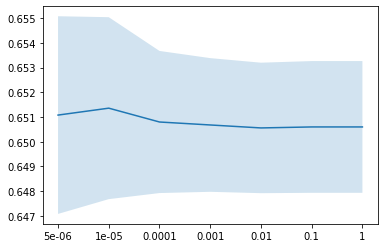

In [147]:
plot_cv_res(clf_lr1.cv_results_, 'param_C')

*C-Support Vector Classification*

In [117]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold

model_svc = SVC(max_iter=10000)
parameters = {'C': [0.005, 0.01, 0.07, 0.10, 0.15, 0.5, 1]}

clf_svc1 = GridSearchCV(model_svc, parameters, cv=KFold(n_splits=5))
clf_svc1.fit(train1[numeric_features].iloc[:5000], train1['radiant_won'].iloc[:5000])

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(max_iter=10000),
             param_grid={'C': [0.005, 0.01, 0.07, 0.1, 0.15, 0.5, 1]})

In [118]:
clf_svc1.cv_results_['mean_test_score'].max()

0.654

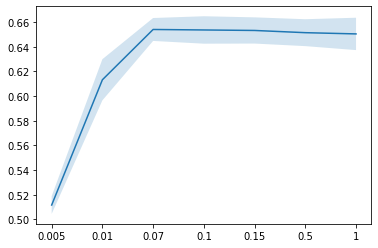

In [148]:
plot_cv_res(clf_svc1.cv_results_, 'param_C')

*Multi-layer Perceptron Classifier*

In [120]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, KFold

model_mlp = MLPClassifier(max_iter=1000)
parameters = {'hidden_layer_sizes': [(15,), (20,), (50,), (10, 15, 10), (20, 50, 20)]}

clf_mlp1 = GridSearchCV(model_mlp, parameters, cv=KFold(n_splits=5))
clf_mlp1.fit(train1[numeric_features], train1['radiant_won'])
pred_mlp = clf_mlp1.predict(train1[numeric_features])

In [121]:
clf_mlp1.cv_results_['mean_test_score'].max()

0.6107168602322787

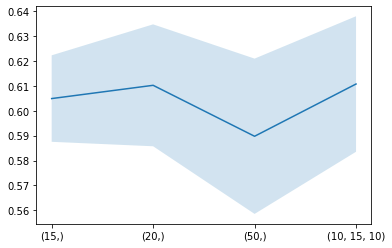

In [149]:
plot_cv_res(clf_mlp1.cv_results_, 'param_hidden_layer_sizes')

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это могло повлиять на качество, давайте посмотрим на значения самих признаков.

**Задание 4** (1 балл) 

Посмотрите на значения признаков по gold и lh. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

In [38]:
train1[numeric_features].head()

,radiant_gold_mean,dire_gold_mean,radiant_lh_mean,dire_lh_mean
0,4290.8,4419.0,29.6,38.4
1,4433.0,4907.2,31.4,28.8
2,4278.4,3109.6,34.8,19.8
3,3607.6,3496.8,28.6,20.2
4,3203.4,4408.2,19.2,29.0


*Значения признаков по gold порядка тысячи, lh -- порядка десяти. Неотмасштабированные признаки не портят точность линейной регрессии, но портят точность метода опорных векторов и многослойного перцептрона.*

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 

**Задание 5** (1.5 балла) 

Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество алгоритмов и почему?

In [39]:
from sklearn.preprocessing import scale

train1_scaled = train1.copy()
train1_scaled[numeric_features] = scale(train1[numeric_features])
train1_scaled['radiant_won'].replace(0, -1, inplace=True)

*Logistic Regression Classifier*

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold

model_lr = LogisticRegression(max_iter=1000)
parameters = {'penalty': ['l2'], 'C': [0.000005, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

clf_lr2 = GridSearchCV(model_lr, parameters, cv=KFold(n_splits=5))
clf_lr2.fit(train1_scaled[numeric_features], train1_scaled['radiant_won'])

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [5e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'penalty': ['l2']})

In [125]:
clf_lr2.cv_results_['mean_test_score'].max()

0.6511973407127593

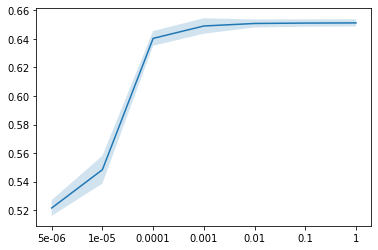

In [151]:
plot_cv_res(clf_lr2.cv_results_, 'param_C')

*C-Support Vector Classification*

In [127]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold

model_svc = SVC(max_iter=10000)
parameters = {'C': [0.005, 0.01, 0.07, 0.10, 0.15, 0.5, 1]}

clf_svc2 = GridSearchCV(model_svc, parameters, cv=KFold(n_splits=5))
clf_svc2.fit(train1_scaled[numeric_features].iloc[:5000], train1_scaled['radiant_won'].iloc[:5000])

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(max_iter=10000),
             param_grid={'C': [0.005, 0.01, 0.07, 0.1, 0.15, 0.5, 1]})

In [128]:
clf_svc2.cv_results_['mean_test_score'].max()

0.6517999999999999

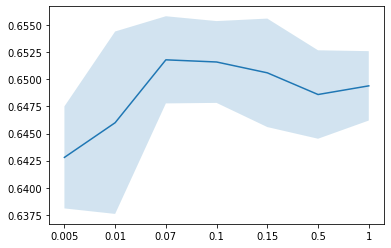

In [152]:
plot_cv_res(clf_svc2.cv_results_, 'param_C')

*Multi-layer Perceptron Classifier*

In [136]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, KFold

model_mlp = MLPClassifier(max_iter=1000)
parameters = {'hidden_layer_sizes': [(20,), (50,), (100,)]}

clf_mlp2 = GridSearchCV(model_mlp, parameters, cv=KFold(n_splits=5))
clf_mlp2.fit(train1_scaled[numeric_features], train1_scaled['radiant_won'])
pred_mlp = clf_mlp2.predict(train1[numeric_features])

In [137]:
clf_mlp2.cv_results_['mean_test_score'].max()

0.6502762273687384

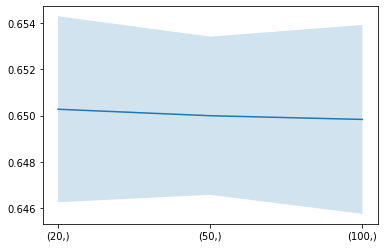

In [153]:
plot_cv_res(clf_mlp2.cv_results_, 'param_hidden_layer_sizes')

*Качество первого алгоритма не изменилось, второго и третьего выросло.*

**Задание 6** (2 балла) 

Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма. Какие гиперпараметры вы настраивали? Удалось ли улучшить качество алгоритмов?

*Logistic Regression Classifier*

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold

model_lr_sc = LogisticRegression(max_iter=1000)
parameters = {'solver': ['saga'], 'penalty': ['elasticnet'], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1], 'C': [0.07, 0.10, 0.15, 0.5, 1, 5, 8, 10, 12]}

clf = GridSearchCV(model_lr_sc, parameters, cv=KFold(n_splits=5))
clf.fit(train1_scaled[numeric_features], train1_scaled['radiant_won'])

params_lr_sc = clf.cv_results_['params'][clf.cv_results_['mean_test_score'].argmax()]

print(clf.cv_results_['mean_test_score'].max())
print(params_lr_sc)

0.6512373807527994
{'C': 0.15, 'l1_ratio': 0, 'penalty': 'elasticnet', 'solver': 'saga'}


In [ ]:
'''
0.6512373807527994
{'C': 0.15, 'l1_ratio': 0, 'penalty': 'elasticnet', 'solver': 'saga'}
'''

*C-Support Vector Classification*

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold

model_svc = SVC(max_iter=1000)
parameters = {'C': [0.07, 0.10, 0.15], 'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': ['auto', 'scale']}

clf = GridSearchCV(model_svc, parameters, cv=KFold(n_splits=5))
clf.fit(train1_scaled[numeric_features].iloc[:5000], train1_scaled['radiant_won'].iloc[:5000])

params_svc_sc = clf.cv_results_['params'][clf.cv_results_['mean_test_score'].argmax()]

print(clf.cv_results_['mean_test_score'].max())
print(params_svc_sc)

In [ ]:
'''
0.5974
{'C': 0.07, 'gamma': 'auto', 'kernel': 'rbf'}
'''

*Multi-layer Perceptron Classifier*

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, KFold

model_mlp = MLPClassifier(max_iter=1000)
parameters = {'hidden_layer_sizes': [(15,), (10, 15,), (15, 10,), (10, 15, 10)], 'activation': ['identity', 'logistic', 'tanh', 'relu']}

clf = GridSearchCV(model_mlp, parameters, cv=KFold(n_splits=5))
clf.fit(train1_scaled[numeric_features], train1_scaled['radiant_won'])

params_mlp_sc = clf.cv_results_['params'][clf.cv_results_['mean_test_score'].argmax()]

print(clf.cv_results_['mean_test_score'].max())
print(params_mlp_sc)

0.6513575008729193
{'activation': 'identity', 'hidden_layer_sizes': (15, 10)}


In [ ]:
'''
0.6513575008729193
{'activation': 'identity', 'hidden_layer_sizes': (15, 10)}
'''

### Добавление категориальных признаков в модели

**Задание 7** (1.5 балла) 

Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Для каких целей можно использовать знание качества на обучающей части выборки?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?
* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

In [46]:
from sklearn.model_selection import learning_curve

In [47]:
def draw_learning_curve(lc, name=''):
    plt.title(name + ' learning curve')

    ax, = plt.plot(lc[0], lc[1].mean(axis=1))
    plt.fill_between(lc[0], lc[1].min(axis=1), lc[1].max(axis=1), alpha=0.1)

    bx, = plt.plot(lc[0], lc[2].mean(axis=1))
    plt.fill_between(lc[0], lc[2].min(axis=1), lc[2].max(axis=1), alpha=0.1)

    plt.legend([ax, bx], ['train', 'cv'])
    plt.show()

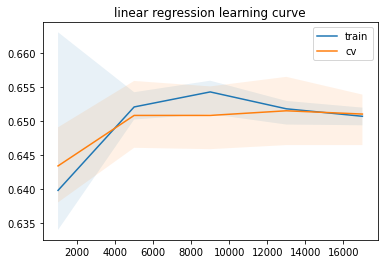

In [48]:
lc_lr = learning_curve(LogisticRegression(max_iter=1000, **params_lr_sc), train1_scaled[numeric_features], train1_scaled['radiant_won'], train_sizes=range(1000, 19979, 4000))
draw_learning_curve(lc_lr, 'linear regression')

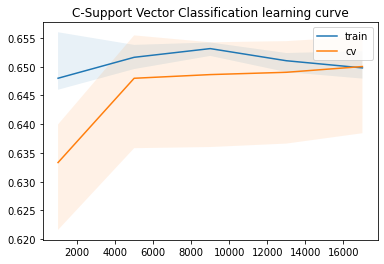

In [49]:
lc_svc = learning_curve(SVC(max_iter=10000, **params_svc_sc), train1_scaled[numeric_features], train1_scaled['radiant_won'], train_sizes=range(1000, 19979, 4000))
draw_learning_curve(lc_svc, 'C-Support Vector Classification')

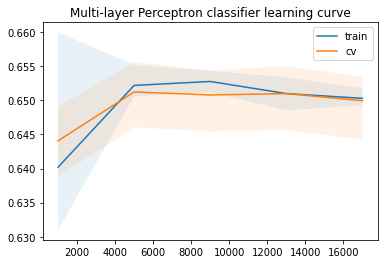

In [50]:
lc_mlp = learning_curve(MLPClassifier(max_iter=1000, **params_mlp_sc), train1_scaled[numeric_features], train1_scaled['radiant_won'], train_sizes=range(1000, 19979, 4000))
draw_learning_curve(lc_mlp, 'Multi-layer Perceptron classifier')

*С ростом числа объектов наблюдается монотонный рост качества на тестовой выборке. На обучающей качество сначала растёт, а потом падает до уровня качества на тестовой выборке.*

*На малых объёмах данных лучше обучаются первый и третий алгоритм.*

*Думаю, что добавление новых объектов значительно не повысит качество, но должно повысить добавление новых признаков, на существующем наборе данных насыщение произошло.*

*Переобучения не вижу.*

Будьте внимательными, для части матчей из test.csv отсутствуют некоторые данные, для этих матчей все равно требуется что-то предсказать.

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**Задание 8** (1.5 балла) 

Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn). Это задание предлагается делать с использованием *heroes.csv*. Представьте каждую из команд в виде one-hot-encoded вектора с пятью единицами и остальными нулями.

In [51]:
heroes = pd.read_csv(PATH + 'heroes.csv')
heroes

,mid,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,91,42,87,15,65,11,6,34,69,74
1,1,69,85,71,24,64,74,68,39,65,11
2,2,17,40,31,67,99,32,7,72,48,104
3,3,80,43,101,71,94,69,70,98,24,39
4,4,25,15,75,29,95,3,32,55,64,86
...,...,...,...,...,...,...,...,...,...,...,...
49943,49943,3,89,75,81,29,40,94,47,56,68
49944,49944,64,92,69,82,18,104,81,29,5,28
49945,49945,99,109,96,15,2,69,91,53,77,87
49946,49946,69,32,64,65,8,21,22,40,75,59


In [52]:
heroes_encoded = pd.get_dummies(heroes, columns=['player_{}'.format(p) for p in range(0, 10)])
heroes_encoded.head()

,mid,player_0_0,player_0_1,player_0_2,player_0_3,player_0_4,player_0_5,player_0_6,player_0_7,player_0_8,player_0_9,player_0_10,player_0_11,player_0_12,player_0_13,player_0_14,player_0_15,player_0_16,player_0_17,player_0_18,player_0_19,player_0_20,player_0_21,player_0_22,player_0_23,player_0_24,player_0_25,player_0_26,player_0_27,player_0_28,player_0_29,player_0_30,player_0_31,player_0_32,player_0_33,player_0_34,player_0_35,player_0_36,player_0_37,player_0_38,...,player_9_71,player_9_72,player_9_73,player_9_74,player_9_75,player_9_76,player_9_77,player_9_78,player_9_79,player_9_80,player_9_81,player_9_82,player_9_83,player_9_84,player_9_85,player_9_86,player_9_87,player_9_88,player_9_89,player_9_90,player_9_91,player_9_92,player_9_93,player_9_94,player_9_95,player_9_96,player_9_97,player_9_98,player_9_99,player_9_100,player_9_101,player_9_102,player_9_103,player_9_104,player_9_105,player_9_106,player_9_107,player_9_108,player_9_109,player_9_110
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


После кодирования признаков получилось достаточно много и правильно будет заново подобрать оптимальные гиперпараметры для моделей. 

**Задание 9** (1.5 балла)

Добавьте к масштабированным вещественным признакам закодированные категориальные и подберите гиперпараметры заново. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

One-hot encoding значительно увеличил количество входных данных. 

Как изменилось количество параметров у моделей? Наблюдается ли переобучение?

In [53]:
# train1 = pd.merge(train, gold[gold['times'] == 600], how='inner', on='mid')
# train1 = train1.rename(columns={'player_{}'.format(i): 'player_{}_gold'.format(i) for i in range(10)})

train2 = train1_scaled[['mid', 'radiant_won'] + numeric_features].copy()
train2 = pd.merge(train2, heroes_encoded, how='inner', on='mid')
train2 = train2.rename(columns={'player_{}_{}'.format(p, h): 'hero_{}_{}'.format(p, h) for h in range(0, 111) for p in range(0, 10)})

heroes_colnames = ['hero_{}_{}'.format(p, h) for h in range(0, 111) for p in range(0, 10)]

In [54]:
train2.head()

,mid,radiant_won,radiant_gold_mean,dire_gold_mean,radiant_lh_mean,dire_lh_mean,hero_0_0,hero_0_1,hero_0_2,hero_0_3,hero_0_4,hero_0_5,hero_0_6,hero_0_7,hero_0_8,hero_0_9,hero_0_10,hero_0_11,hero_0_12,hero_0_13,hero_0_14,hero_0_15,hero_0_16,hero_0_17,hero_0_18,hero_0_19,hero_0_20,hero_0_21,hero_0_22,hero_0_23,hero_0_24,hero_0_25,hero_0_26,hero_0_27,hero_0_28,hero_0_29,hero_0_30,hero_0_31,hero_0_32,hero_0_33,...,hero_9_71,hero_9_72,hero_9_73,hero_9_74,hero_9_75,hero_9_76,hero_9_77,hero_9_78,hero_9_79,hero_9_80,hero_9_81,hero_9_82,hero_9_83,hero_9_84,hero_9_85,hero_9_86,hero_9_87,hero_9_88,hero_9_89,hero_9_90,hero_9_91,hero_9_92,hero_9_93,hero_9_94,hero_9_95,hero_9_96,hero_9_97,hero_9_98,hero_9_99,hero_9_100,hero_9_101,hero_9_102,hero_9_103,hero_9_104,hero_9_105,hero_9_106,hero_9_107,hero_9_108,hero_9_109,hero_9_110
0,0,1,0.522062,0.805408,0.449453,1.934968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,-1,0.794057,1.748483,0.761431,0.321175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,0.498343,-1.724013,1.350722,-1.191756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,1,-0.784740,-0.976043,0.276132,-1.124515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,-1.557880,0.784545,-1.353084,0.354796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [55]:
categorial_features = heroes_colnames
num_cat_features = numeric_features + categorial_features

*Logistic Regression Classifier*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold

model_lr_sc = LogisticRegression(max_iter=1000)
parameters = {'solver': ['saga'], 'penalty': ['elasticnet'], 'l1_ratio': [0], 'C': [0.05]}

clf = GridSearchCV(model_lr_sc, parameters, cv=KFold(n_splits=5), verbose=3)
clf.fit(train2[num_cat_features].iloc[:10000], train2['radiant_won'].iloc[:10000])

params_lr2 = clf.cv_results_['params'][clf.cv_results_['mean_test_score'].argmax()]

In [157]:
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['mean_test_score'].max())
print(params_lr2)

[0.6713]
0.6713
{'C': 0.05, 'l1_ratio': 0, 'penalty': 'elasticnet', 'solver': 'saga'}


In [ ]:
'''
0.6713
{'C': 0.05, 'l1_ratio': 0, 'penalty': 'elasticnet', 'solver': 'saga'}
'''

*C-Support Vector Classification*

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model_svc = SVC(max_iter=10000)
parameters = {'C': [0.1], 'kernel': ['sigmoid']}

clf = GridSearchCV(model_svc, parameters, cv=KFold(n_splits=3), verbose=3)
clf.fit(train2[num_cat_features].iloc[:20000], train2['radiant_won'].iloc[:20000])

params_svc2 = clf.cv_results_['params'][clf.cv_results_['mean_test_score'].argmax()]

In [160]:
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['mean_test_score'].max())
print(params_svc2)

[0.66254976]
0.6625497558005388
{'C': 0.1, 'kernel': 'sigmoid'}


In [ ]:
'''
0.6625497558005388
{'C': 0.1, 'kernel': 'sigmoid'}
'''

*Multi-layer Perceptron Classifier*

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, KFold

model_mlp = MLPClassifier(max_iter=1000)
parameters = {'hidden_layer_sizes': [(50,)], 'activation': ['tanh'], 'tol': [0.005]}

clf = GridSearchCV(model_mlp, parameters, cv=KFold(n_splits=5), verbose=3)
clf.fit(train2[num_cat_features].iloc[:20000], train2['radiant_won'].iloc[:20000])

params_mlp2 = clf.cv_results_['params'][clf.cv_results_['mean_test_score'].argmax()]

In [176]:
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['mean_test_score'].max())
print(params_mlp2)

[0.6677  0.6665  0.6665  0.6672  0.66645 0.6666 ]
0.6677000000000001
{'activation': 'tanh', 'hidden_layer_sizes': (50,), 'tol': 0.005}


In [ ]:
'''
0.6677000000000001
{'activation': 'tanh', 'hidden_layer_sizes': (50,), 'tol': 0.005}
'''

*Качество на втором и третьем алгоритме выросло, на первом не изменилось.*

In [ ]:
params_lr2 = {'C': 0.05, 'l1_ratio': 0, 'penalty': 'elasticnet', 'solver': 'saga'}
lc_lr2 = learning_curve(LogisticRegression(max_iter=10, **params_lr2), train2[num_cat_features], train2['radiant_won'], train_sizes=np.linspace(1000, 19979, 4, dtype=int))

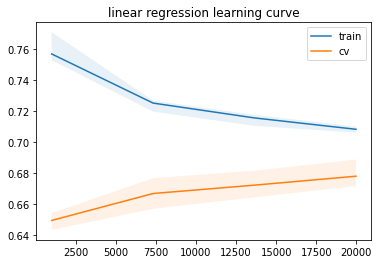

In [217]:
draw_learning_curve(lc_lr2, 'linear regression')

In [ ]:
params_svc2 = {'C': 0.1, 'kernel': 'sigmoid'}
lc_svc2 = learning_curve(SVC(max_iter=20, **params_svc2), train2[num_cat_features], train2['radiant_won'], train_sizes=np.linspace(200, 19979, 6, dtype=int))

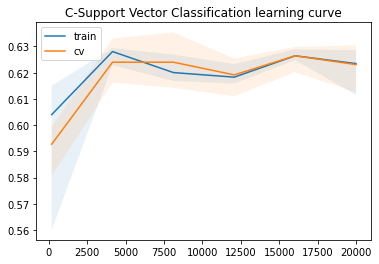

In [227]:
draw_learning_curve(lc_svc2, 'C-Support Vector Classification')

In [ ]:
params_mlp2 = {'activation': 'tanh', 'hidden_layer_sizes': (50,)}
lc_mlp2 = learning_curve(MLPClassifier(max_iter=10, **params_mlp2), train2[num_cat_features], train2['radiant_won'], train_sizes=np.linspace(1000, 19979, 4, dtype=int))

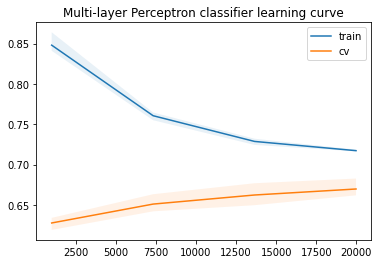

In [221]:
draw_learning_curve(lc_mlp2, 'Multi-layer Perceptron classifier')

*Уменьшил количество итераций до 10, потому что ну очень долго считалось. Тем не менее, на первом и третьем видно, что объектов можно и больше, а вот второму уже, видимо, хватит.*

### Смешивание моделей (blending)

Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**Задание 10** (3 балла)

При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

In [62]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CustomClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, estimator_1, estimator_2, alpha=0.5):
        self.estimator_1 = estimator_1
        self.estimator_2 = estimator_2
        self.alpha = alpha

    def fit(self, X, y):
        self.estimator_1.fit(X, y)
        self.estimator_2.fit(X, y)
    
    def predict(self, X):
        pred_1 = self.estimator_1.predict(X)
        pred_2 = self.estimator_2.predict(X)
        return self.alpha * pred_1 + (1 - self.alpha) * pred_2

    def score(self, X, y):
        return self.alpha * self.estimator_1.score(X, y) + (1 - self.alpha) * self.estimator_1.score(X, y)

**Задание 11** (1.5 балла)

Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

In [ ]:
model_mix = CustomClassifier(LogisticRegression(max_iter=1000, **params_lr_sc), MLPClassifier(max_iter=1000, **params_mlp_sc))

parameters = {'alpha': [0, 0.2, 0.4, 0.6, 0.8, 1]}

clf_mix = GridSearchCV(model_mix, parameters, cv=KFold(n_splits=5), verbose=3)
clf_mix.fit(train2[num_cat_features].iloc[:20000], train2['radiant_won'].iloc[:20000])

params_mix_sc = clf_mix.cv_results_['params'][clf_mix.cv_results_['mean_test_score'].argmax()]

In [202]:
print(clf_mix.cv_results_['mean_test_score'])
print(clf_mix.cv_results_['mean_test_score'].max())
print(params_mix_sc)

[0.67695 0.67695 0.67695 0.677   0.67695 0.67695]
0.677
{'alpha': 0.6}


In [ ]:
'''
0.677
{'alpha': 0.6}
'''

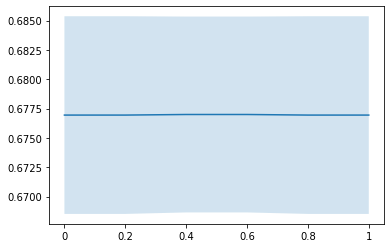

In [184]:
plot_cv_res(clf_mix.cv_results_, 'param_alpha')

*Маленький прирост есть. Простой блендинг может улучшить качество благодаря тому, что, наверное, это уменьшает переобучение, или модели по-разному учитывают признаки, или оттого что на выходе получается {0, 0.4, 0.6, 1} вместо {0, 1}*

### Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей, правильным продолжением является сравнение их между собой.  Воспользуйтесь диаграммой размаха ("ящик с усами") для сравнения алгоритмов между собой. Эту диаграмму можно построить при помощи [boxplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) из matplotlib либо через [обертку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) над ней из pandas.

**Задание 12** (3 балла) 

Для каждого типа классификатора, а так же смешанной модели, выберите тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [67]:
params_lr = {'C': 0.05, 'l1_ratio': 0, 'penalty': 'elasticnet', 'solver': 'saga'}
model_lr = LogisticRegression(max_iter=1000, **params_lr)

params_svc = {'C': 0.1, 'kernel': 'sigmoid'}
model_svc = SVC(max_iter=1000, **params_svc)

params_mlp = {'hidden_layer_sizes': [(1000, 200)], 'activation': ['relu']}
model_mlp = MLPClassifier(max_iter=10, **params_mlp)

params_mix = {'alpha': 0.6}
model_mix = CustomClassifier(
    LogisticRegression(max_iter=1000, **params_lr), 
    MLPClassifier(max_iter=10000, **params_mlp), 
    **params_mix
)

*Сначала признаков было много, и объектов было достаточно для насыщения. Переобучения я не увидел, спасибо гиперпараметру 'C', который отвечает за степень регуляризации.*

*Потом данные были отмасштабированы. Качество у первого алгоритма не изменилось (полагаю, что изменились параметры модели), у второго тоже, а у третьего качество выросло.*

*Потом признаков стало больше, качество выросло, а насыщения на первом и третьем алгоритмах не произошло. А вот время обучения выросло сильно.*